<a href="https://colab.research.google.com/github/Sagar856/Data-Science-Assignments/blob/main/Assignment_08_PCA_Wine_dataset_Sagar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Perform Principal component analysis and perform clustering

+ Clustering analysis is an unsupervised learning method that separates the data points into several specific bunches or groups, such that the data points in the same groups have similar properties and data points in different groups have different properties in some sense.

+ It comprises of many different methods based on different distance measures. E.g. K-Means (distance between points), Affinity propagation (graph distance), Mean-shift (distance between points), DBSCAN (distance between nearest points), Gaussian mixtures (Mahalanobis distance to centers), Spectral clustering (graph distance), etc.

+ Centrally, all clustering methods use the same approach i.e. first we calculate similarities and then we use it to cluster the data points into groups or batches. Here we will focus on the Density-based spatial clustering of applications with noise (DBSCAN) clustering method.

In [ ]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## 1. Case Summary
### Perform Principal component analysis and perform clustering using first 3 principal component scores (both <font color='red'>Heirarchical and k mean clustering</font>(scree plot or elbow curve) and obtain optimum number of clusters and check whether we have obtained same number of clusters with the original data (class column we have ignored at the begining who shows it has 3 clusters)

In [ ]:
# Import dataset

data = pd.read_csv('/content/wine.csv')
data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## 2. Data Exploration <a class="anchor" id="2"></a>

In [ ]:
data.Type.values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

In [ ]:
data.Type.value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

##### Dropping Type Feature as it is a classifier that we have three types of wines which we need to find in clustering by keeping it will affect our inferences and further analysis

In [ ]:
data['ID'] = range(1,179,1)
data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ID
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,3
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,4
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,5


In [ ]:
df = data.drop('Type', axis=1)

#### Descriptive Statistics

In [ ]:
df.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ID
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,89.500000
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,51.528309
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,45.250000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,89.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,133.750000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,178.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
 13  ID               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


### Missing Values

In [ ]:
df.isnull().sum()

Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
ID                 0
dtype: int64

### Duplicated values

In [ ]:
df[df.duplicated()]

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ID


#### There are no missing / Null and Duplicated  values  either in columns or rows, so we can move on to the next step, which is Exploratory Data Analysis.

## 3. Exploratory Data Analysis<a class="anchor" id="3"></a>

In [ ]:
df.skew()

Alcohol           -0.051482
Malic              1.039651
Ash               -0.176699
Alcalinity         0.213047
Magnesium          1.098191
Phenols            0.086639
Flavanoids         0.025344
Nonflavanoids      0.450151
Proanthocyanins    0.517137
Color              0.868585
Hue                0.021091
Dilution          -0.307285
Proline            0.767822
ID                 0.000000
dtype: float64

### Plotting the histogram of each numerical variable (in this case, all features), the main idea here is to visualize the data distribution for each feature. This method can bring fast insights as:
+ Check the kind of each feature distribution
+ Check data symmetry
+ Verify features frequency
+ Identify outliers

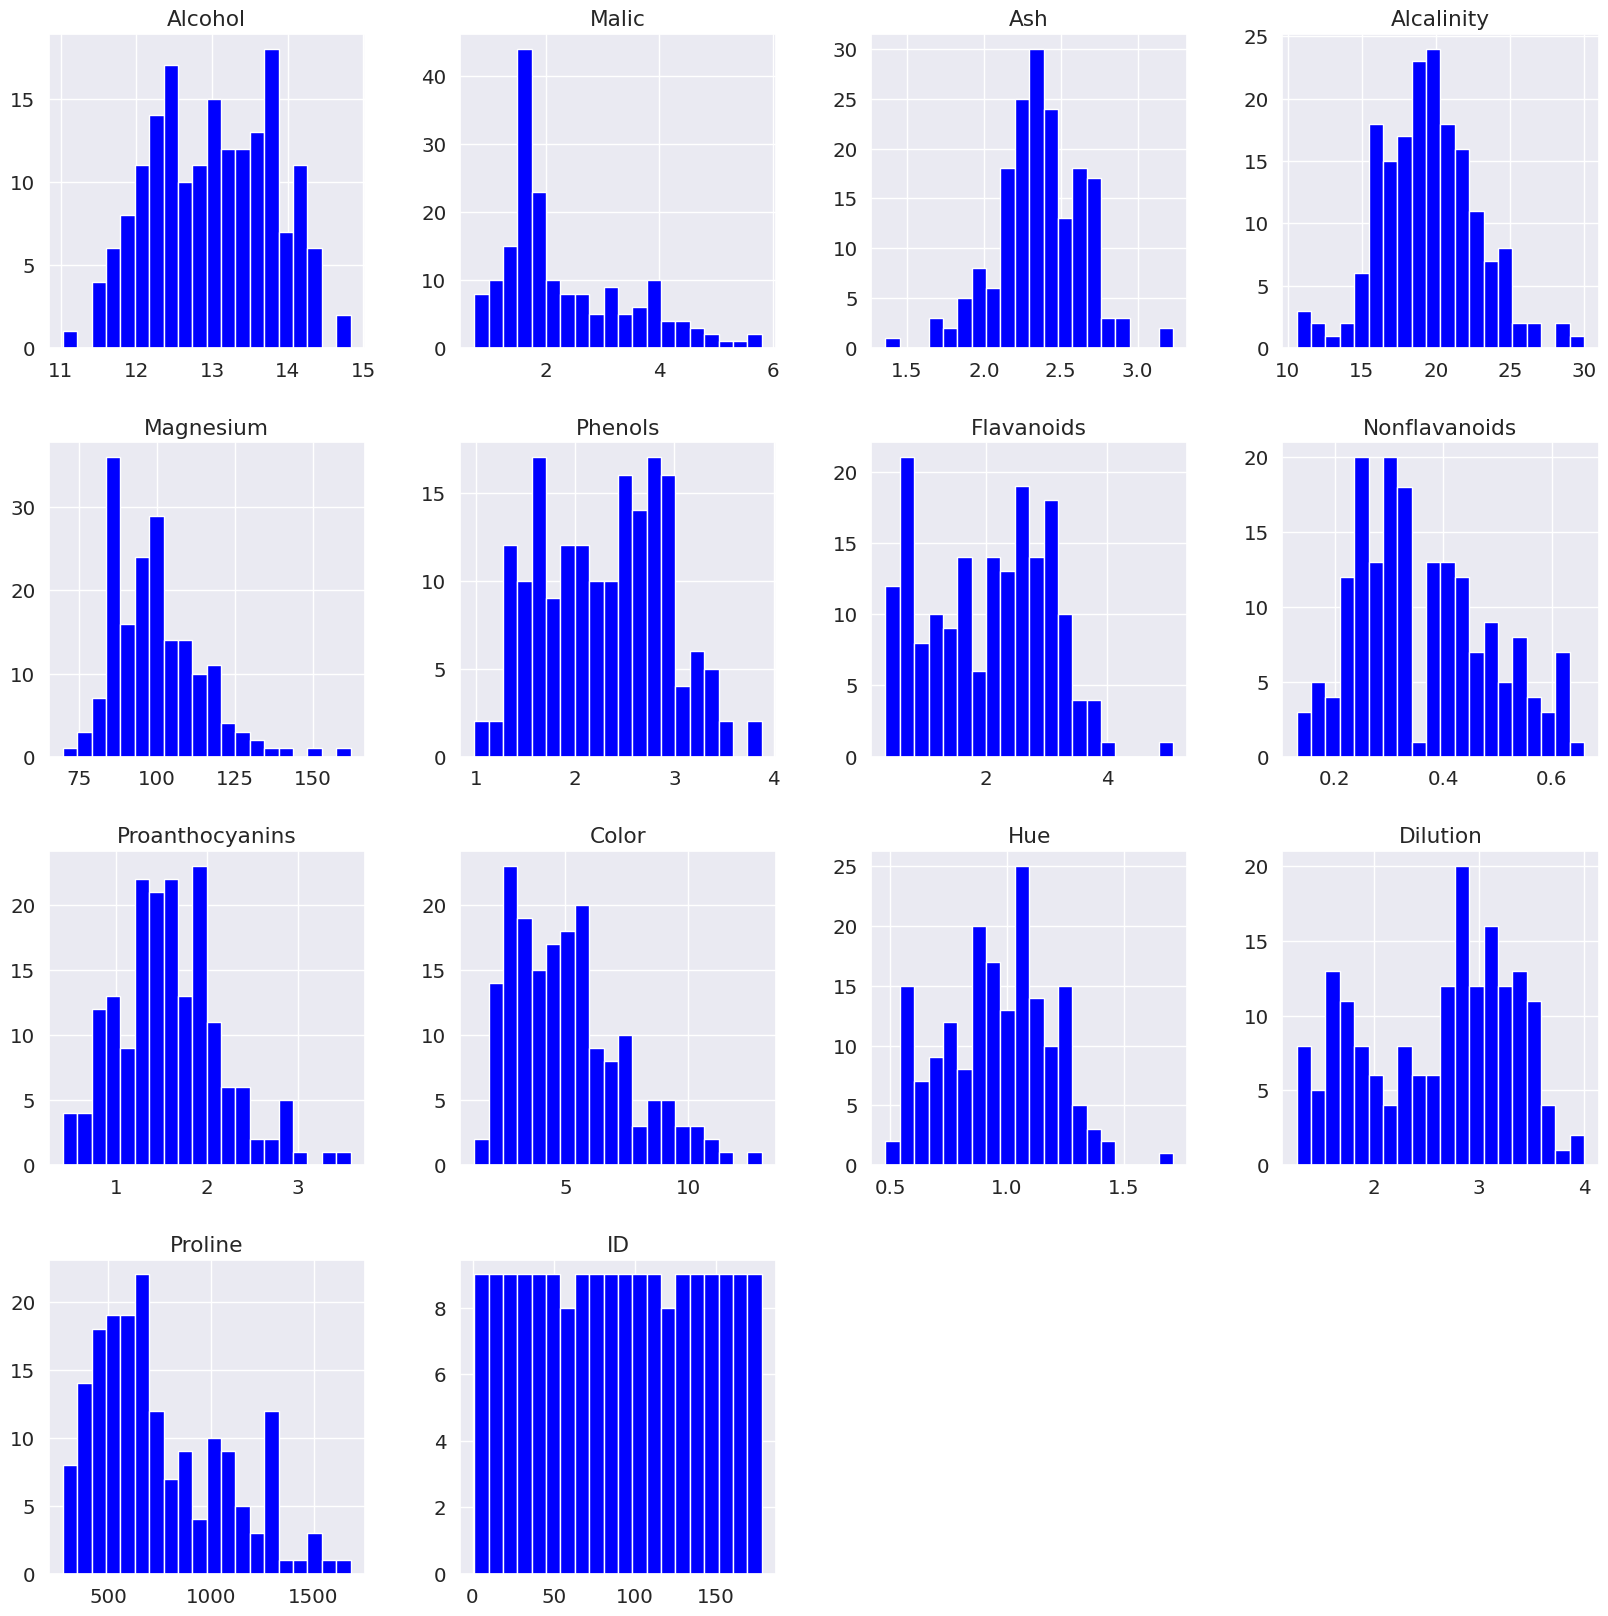

In [ ]:
sns.set(style='dark', font_scale=1.3, rc = {'figure.figsize':(20,20)})
ax = df.hist(bins=20, color='blue')

## Outlier Detection

To reinforce our insights about the data symmetry and their outliers, we can da plot some boxplots:


"A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of box to show the range of the data. The position of the whiskers is set by default to 1.5*IQR (IQR = Q3 - Q1) from the edges of the box. Outlier points are those past the end of the whiskers."

In [ ]:
df.columns

Index(['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline', 'ID'],
      dtype='object')

<ipython-input-16-b2fd371c3f6d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Alcohol',data=ot,palette='crest',ax=axes[0])
<ipython-input-16-b2fd371c3f6d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Malic',data=ot,palette='crest',ax=axes[1])
<ipython-input-16-b2fd371c3f6d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Ash',data=ot,palette='crest',ax=axes[2])
<ipython-input-16-b2fd371c3f6d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to

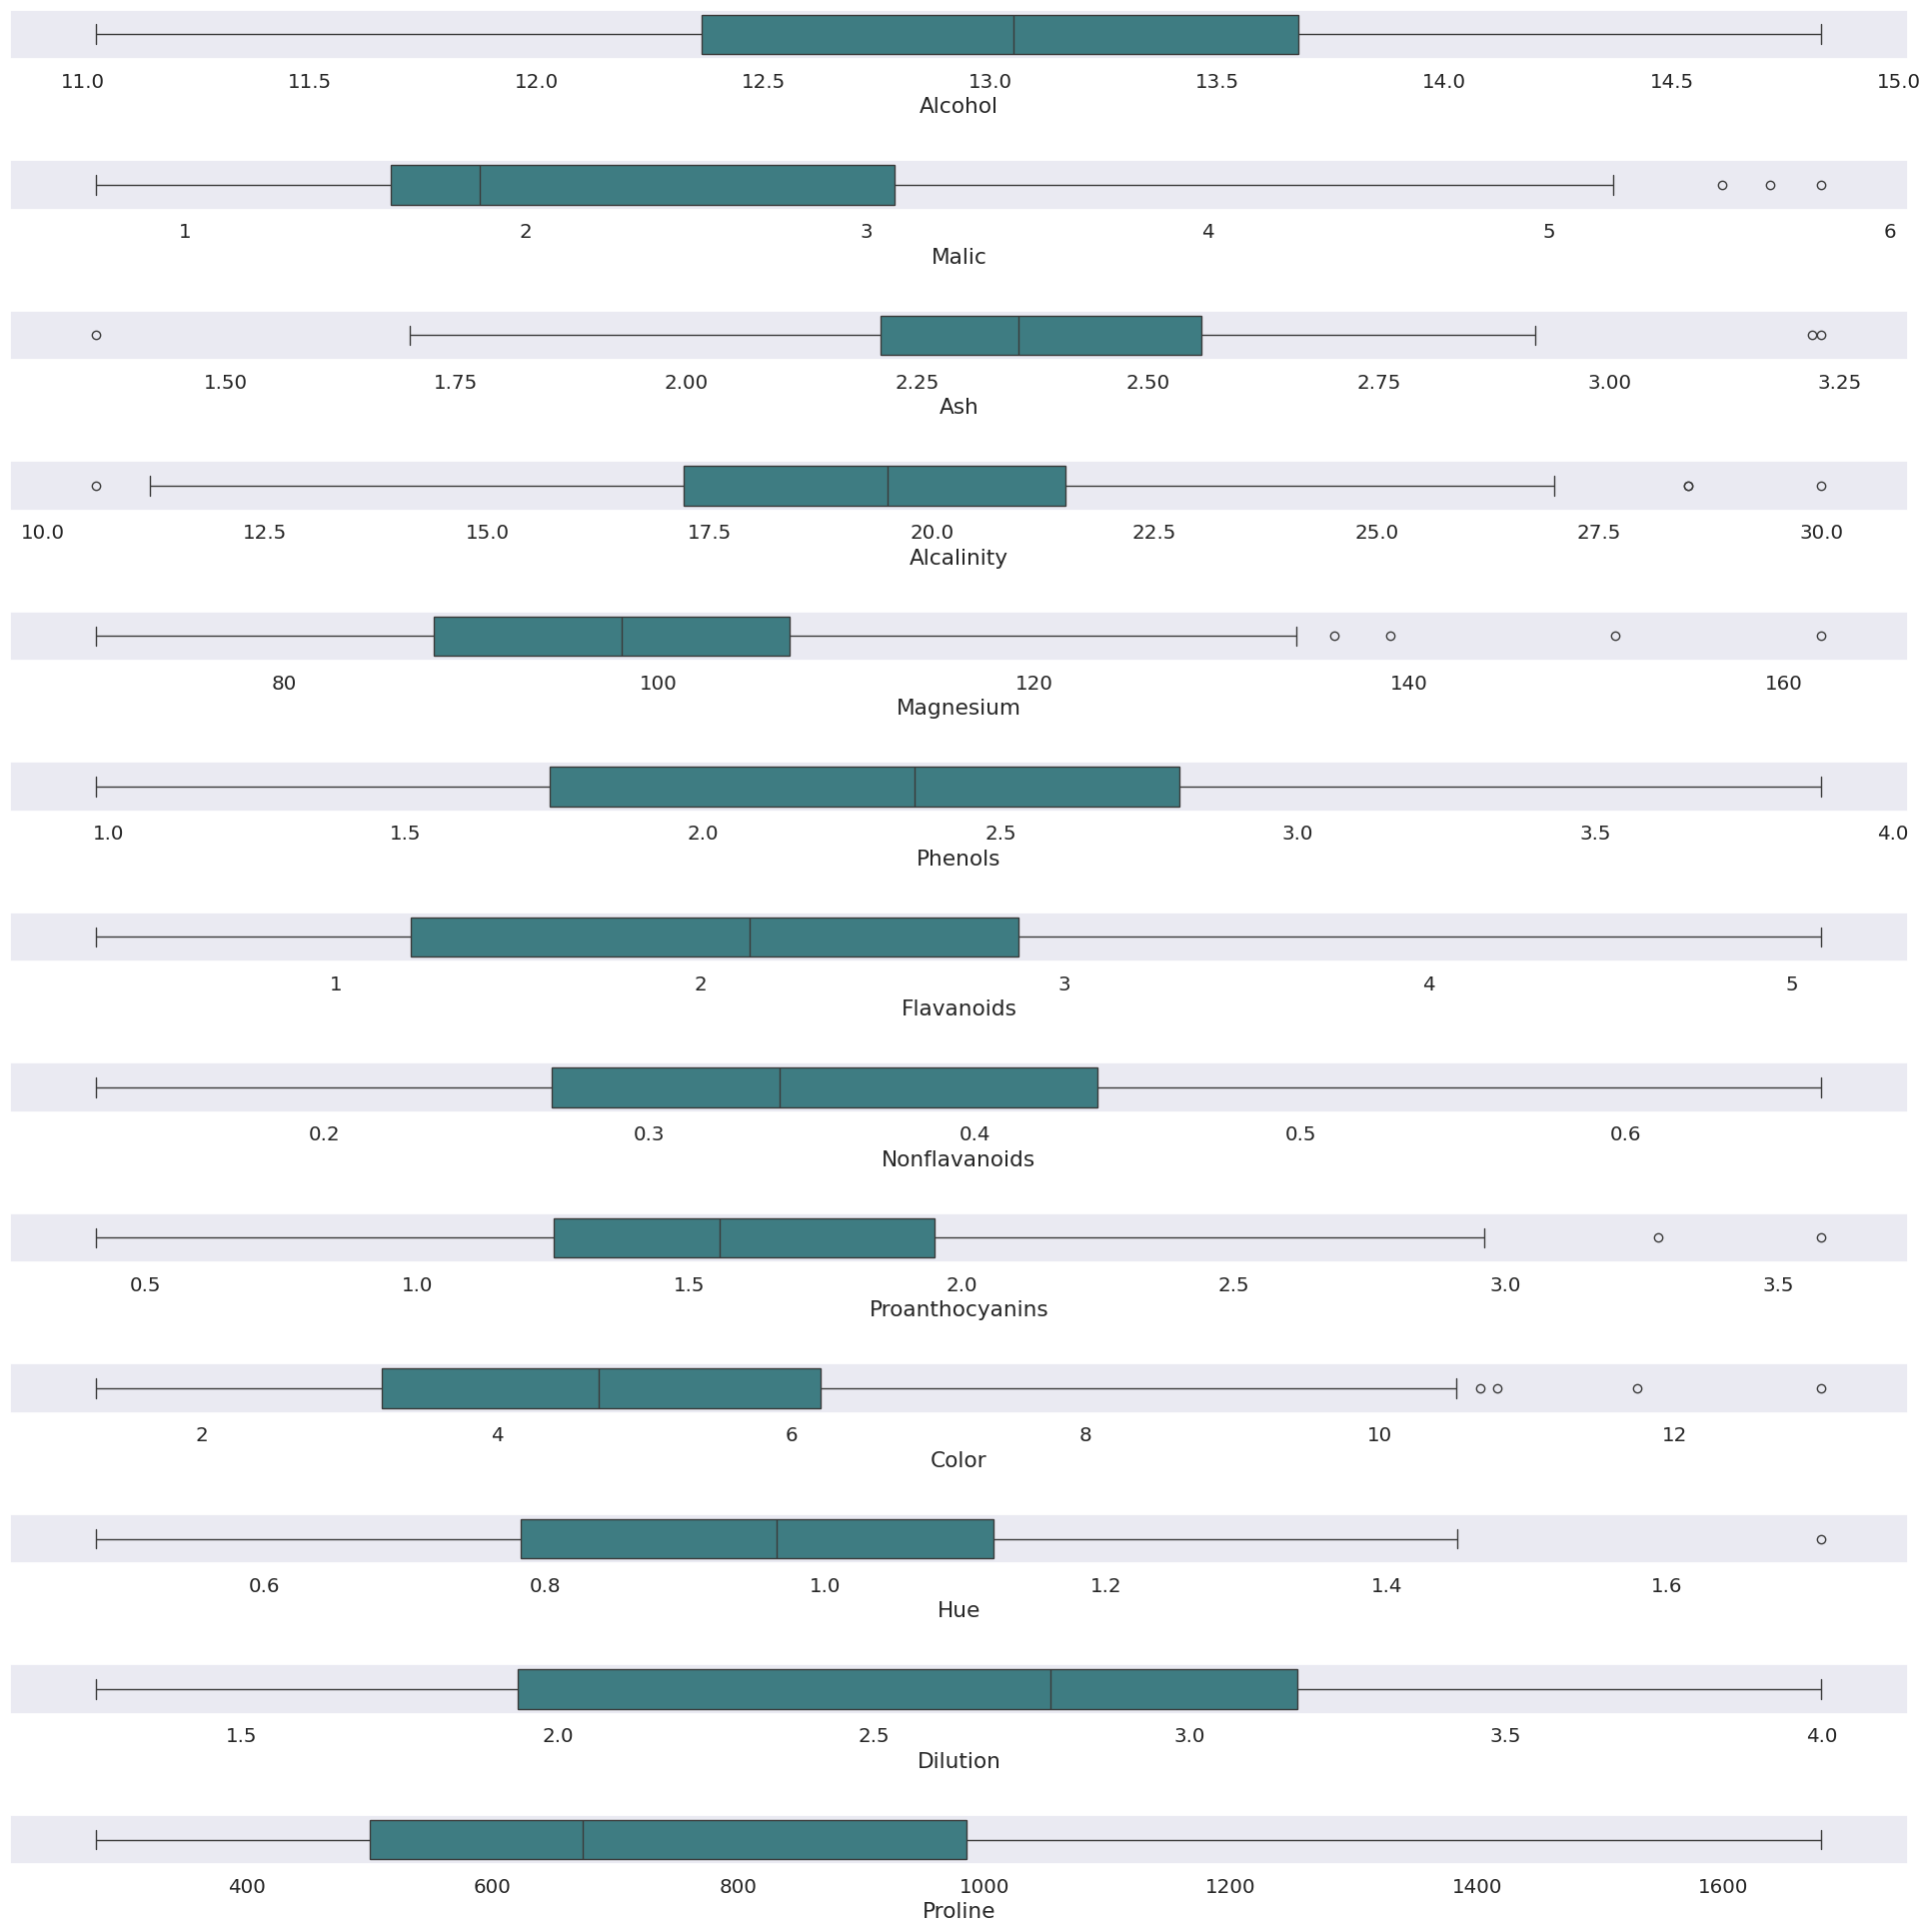

In [ ]:
ot=df.copy()
fig, axes=plt.subplots(13,1,figsize=(20,20),sharex=False,sharey=False)
sns.boxplot(x='Alcohol',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='Malic',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='Ash',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='Alcalinity',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='Magnesium',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='Phenols',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='Flavanoids',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='Nonflavanoids',data=ot,palette='crest',ax=axes[7])
sns.boxplot(x='Proanthocyanins',data=ot,palette='crest',ax=axes[8])
sns.boxplot(x='Color',data=ot,palette='crest',ax=axes[9])
sns.boxplot(x='Hue',data=ot,palette='crest',ax=axes[10])
sns.boxplot(x='Dilution',data=ot,palette='crest',ax=axes[11])
sns.boxplot(x='Proline',data=ot,palette='crest',ax=axes[12])
plt.tight_layout(pad=2.0)

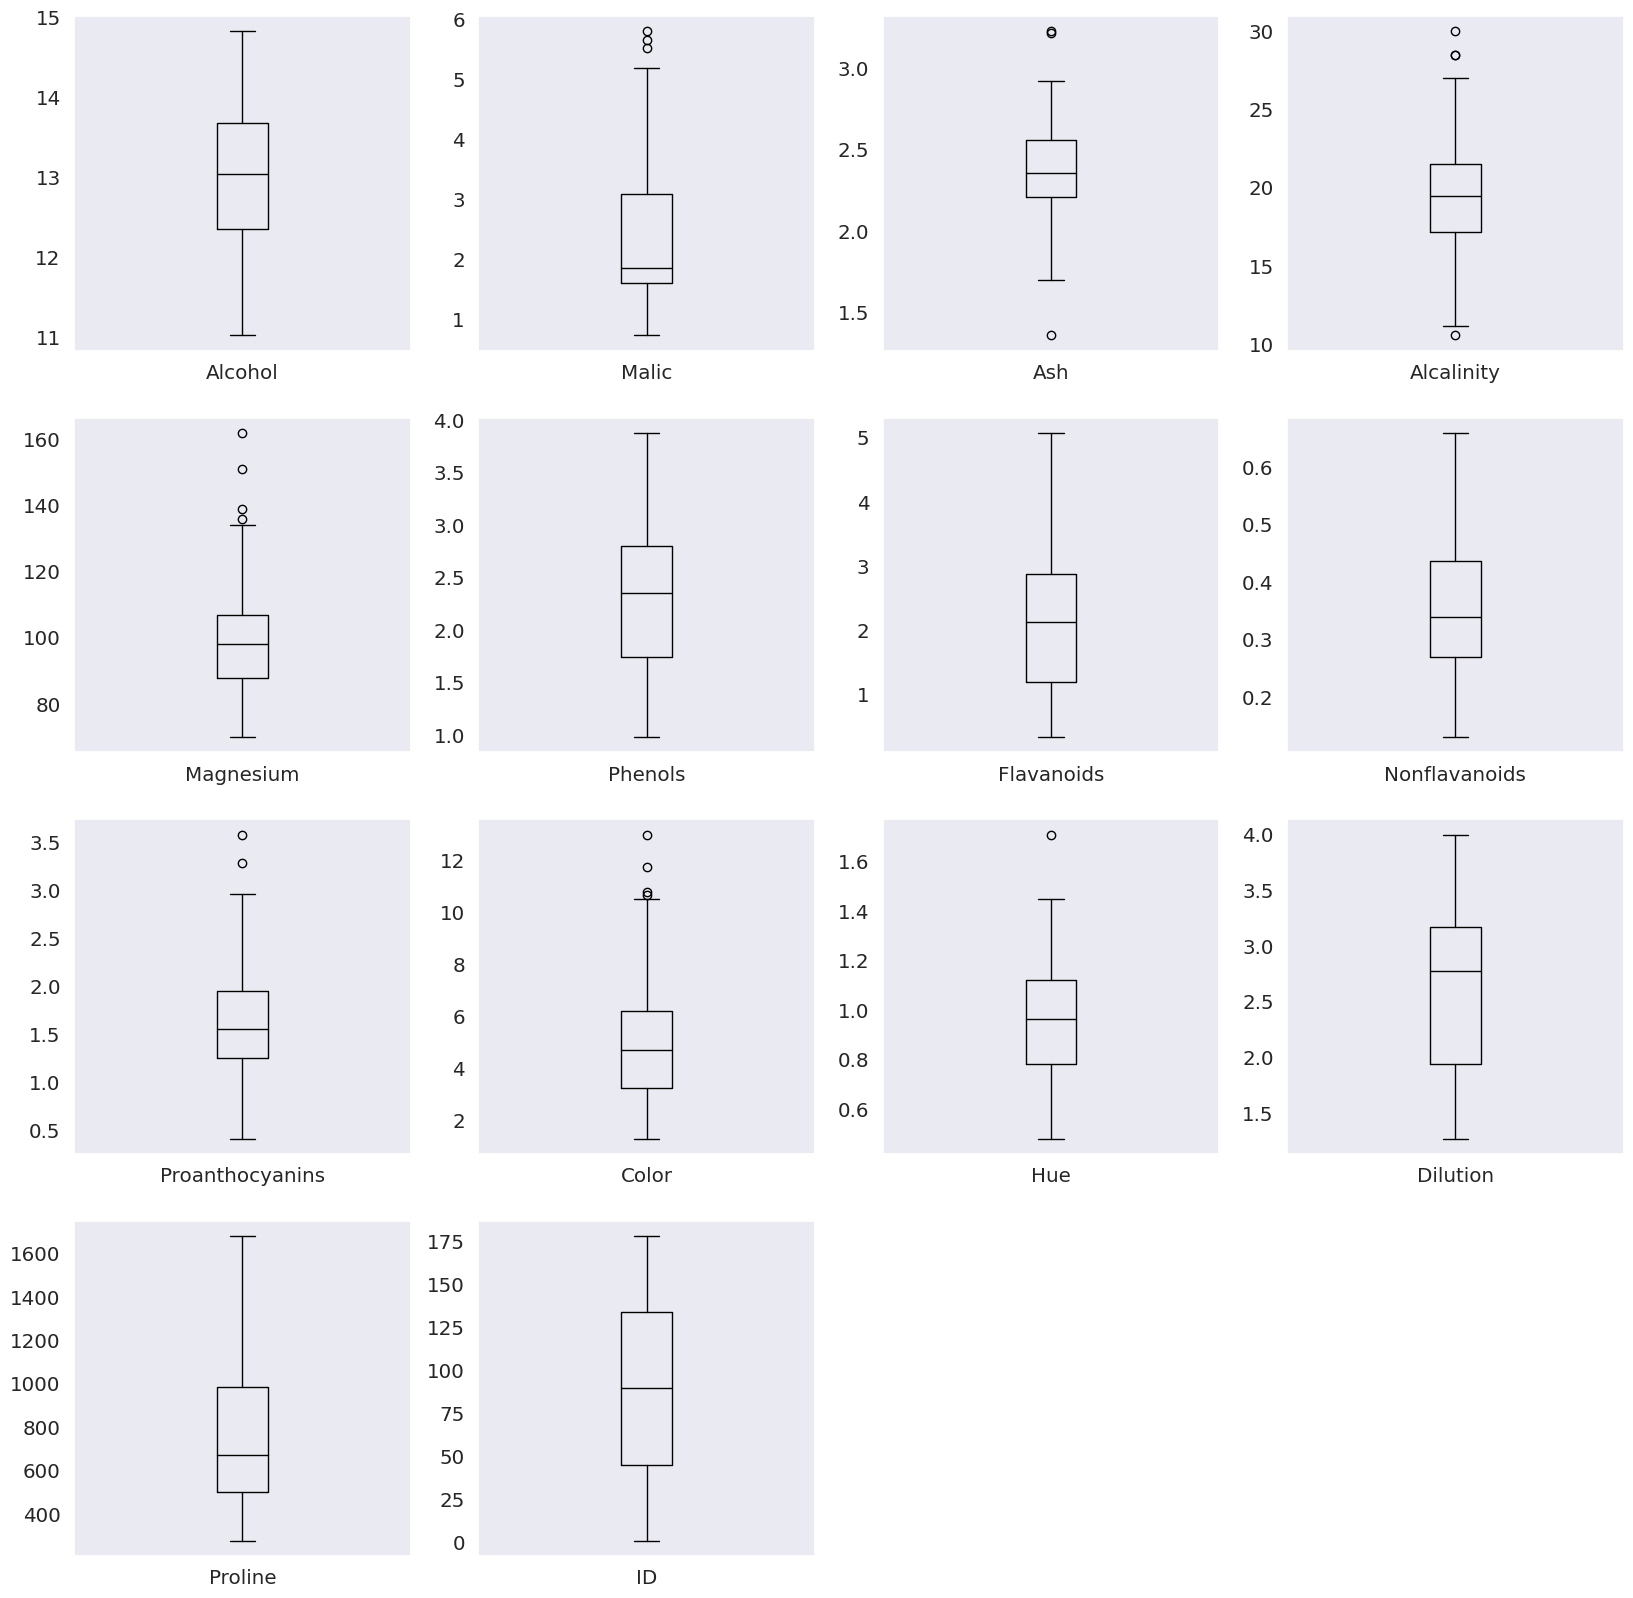

In [ ]:
df.plot(kind='box', subplots = True, layout = (4,4), sharex=False,sharey=False,color='black')
plt.show()

## Data Visualization

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable h

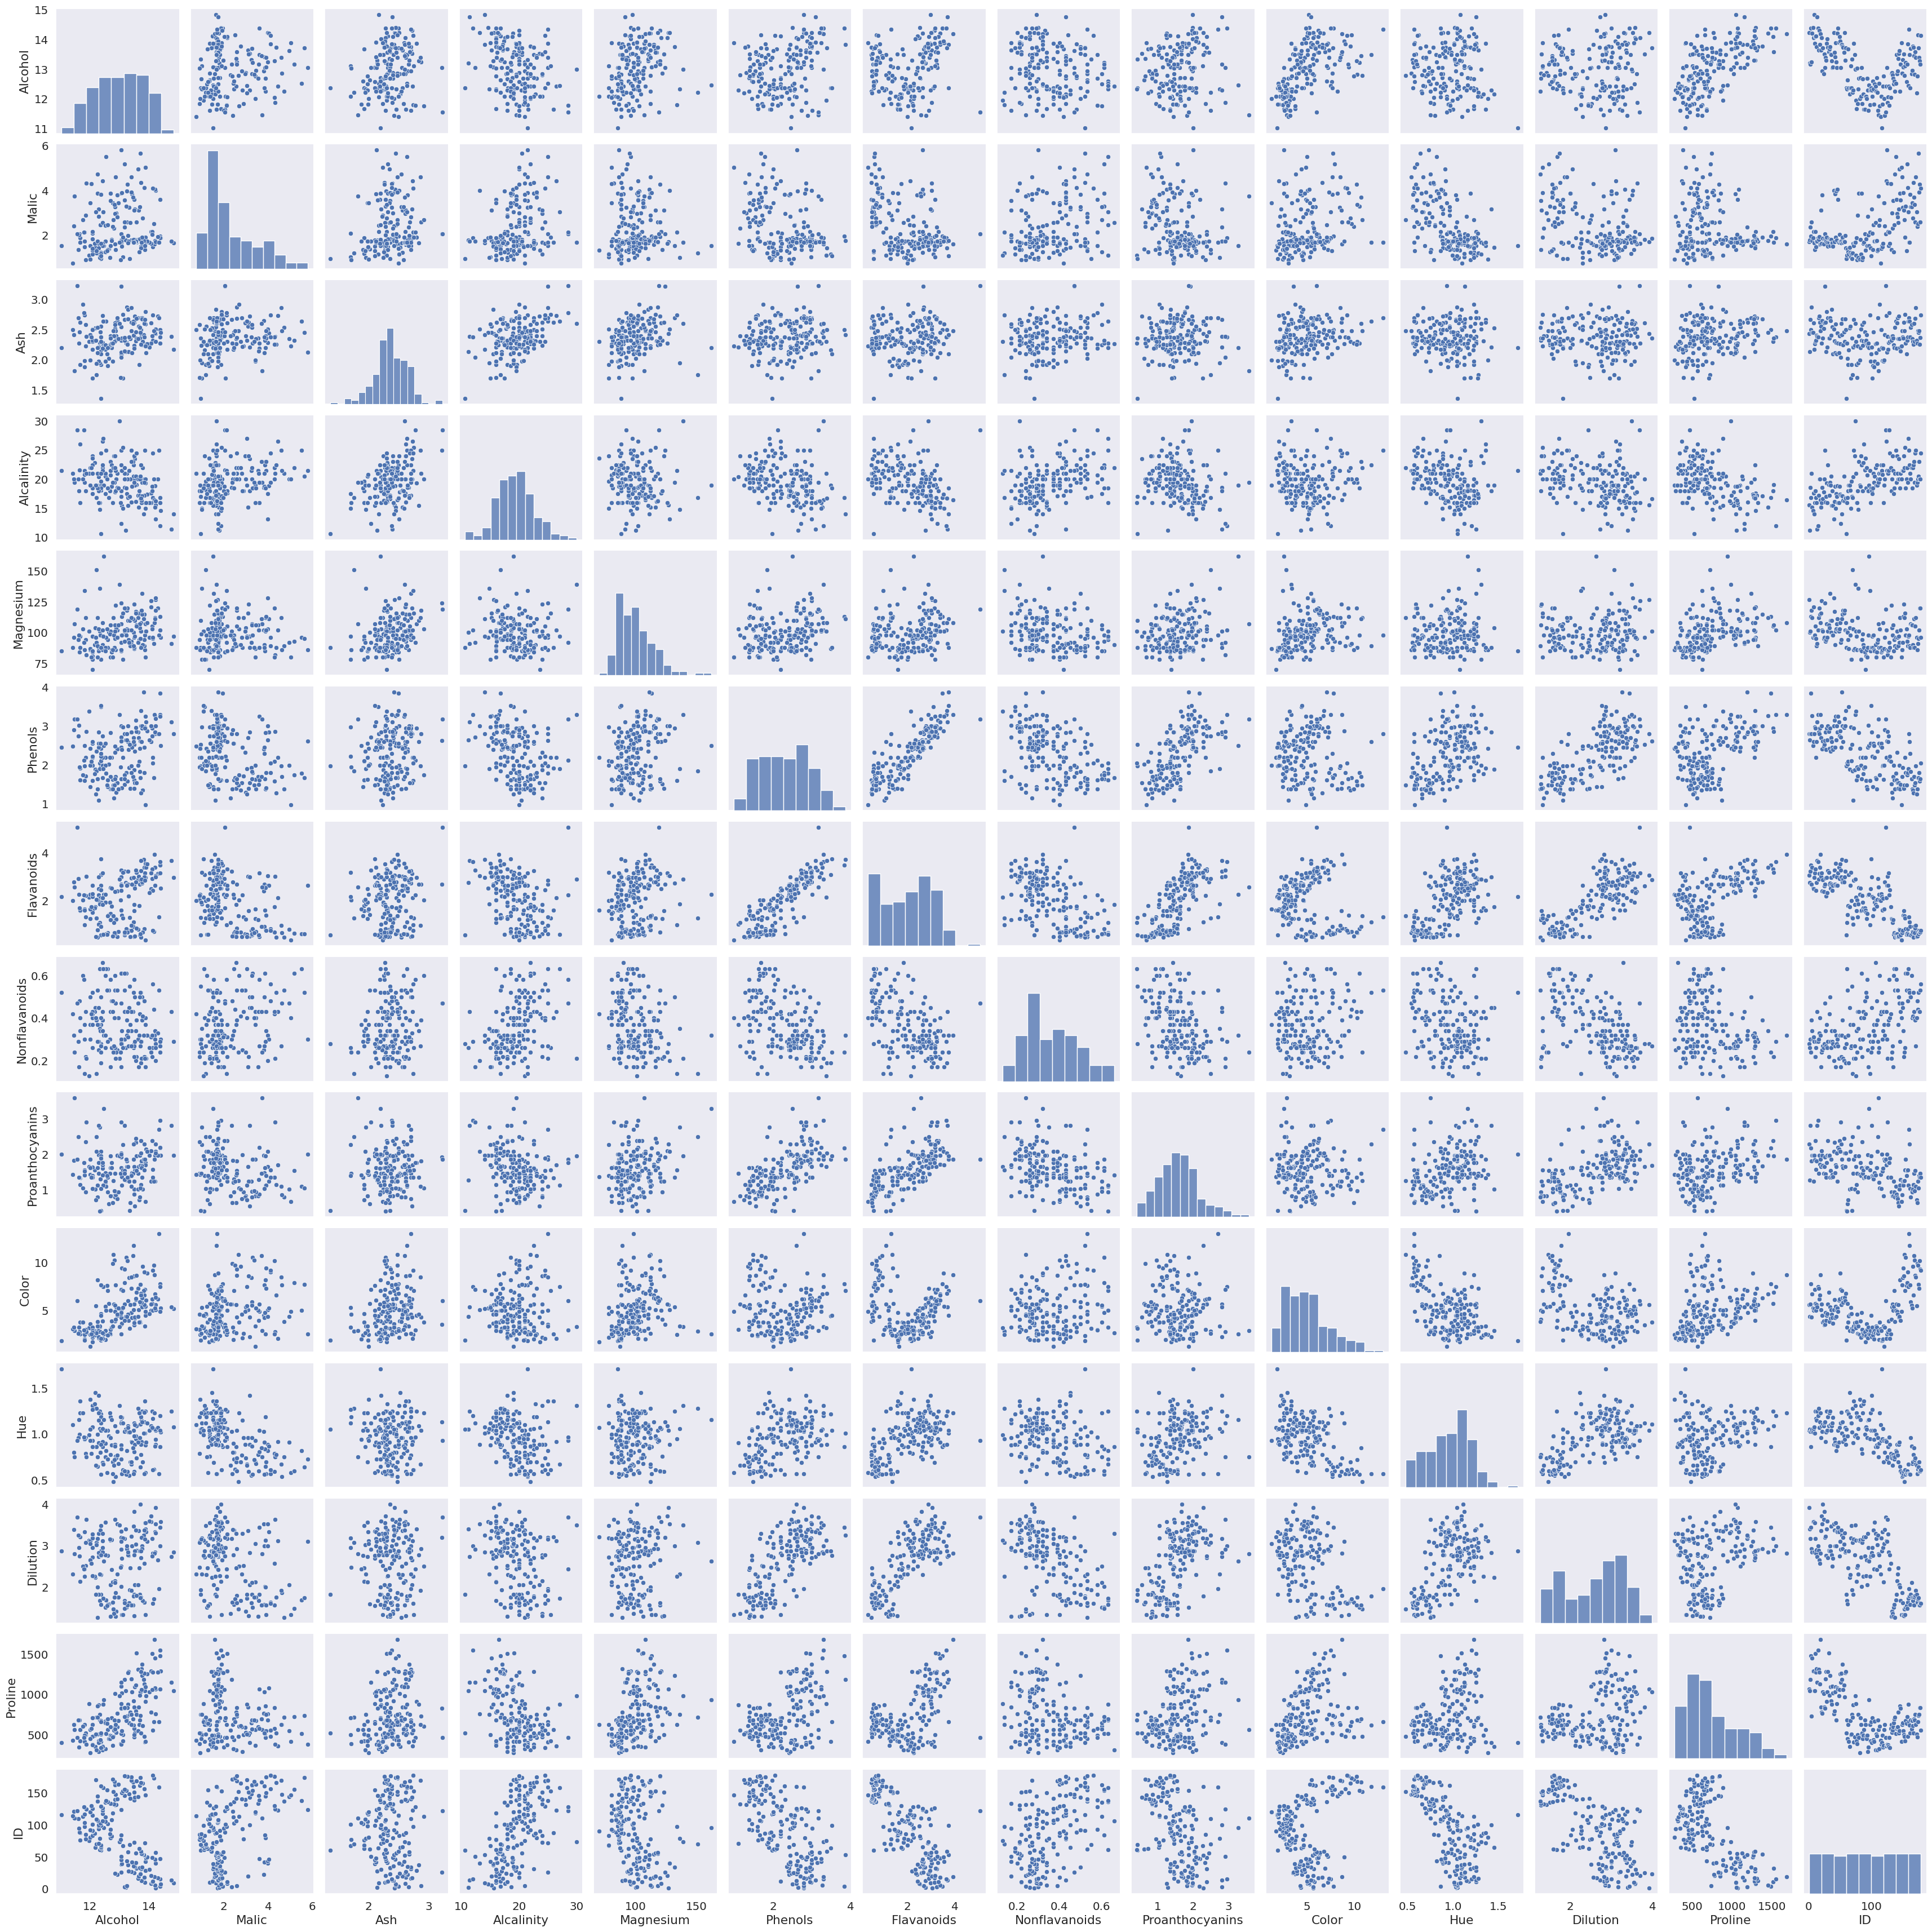

In [ ]:
sns.pairplot(df, palette='dark')
plt.show()

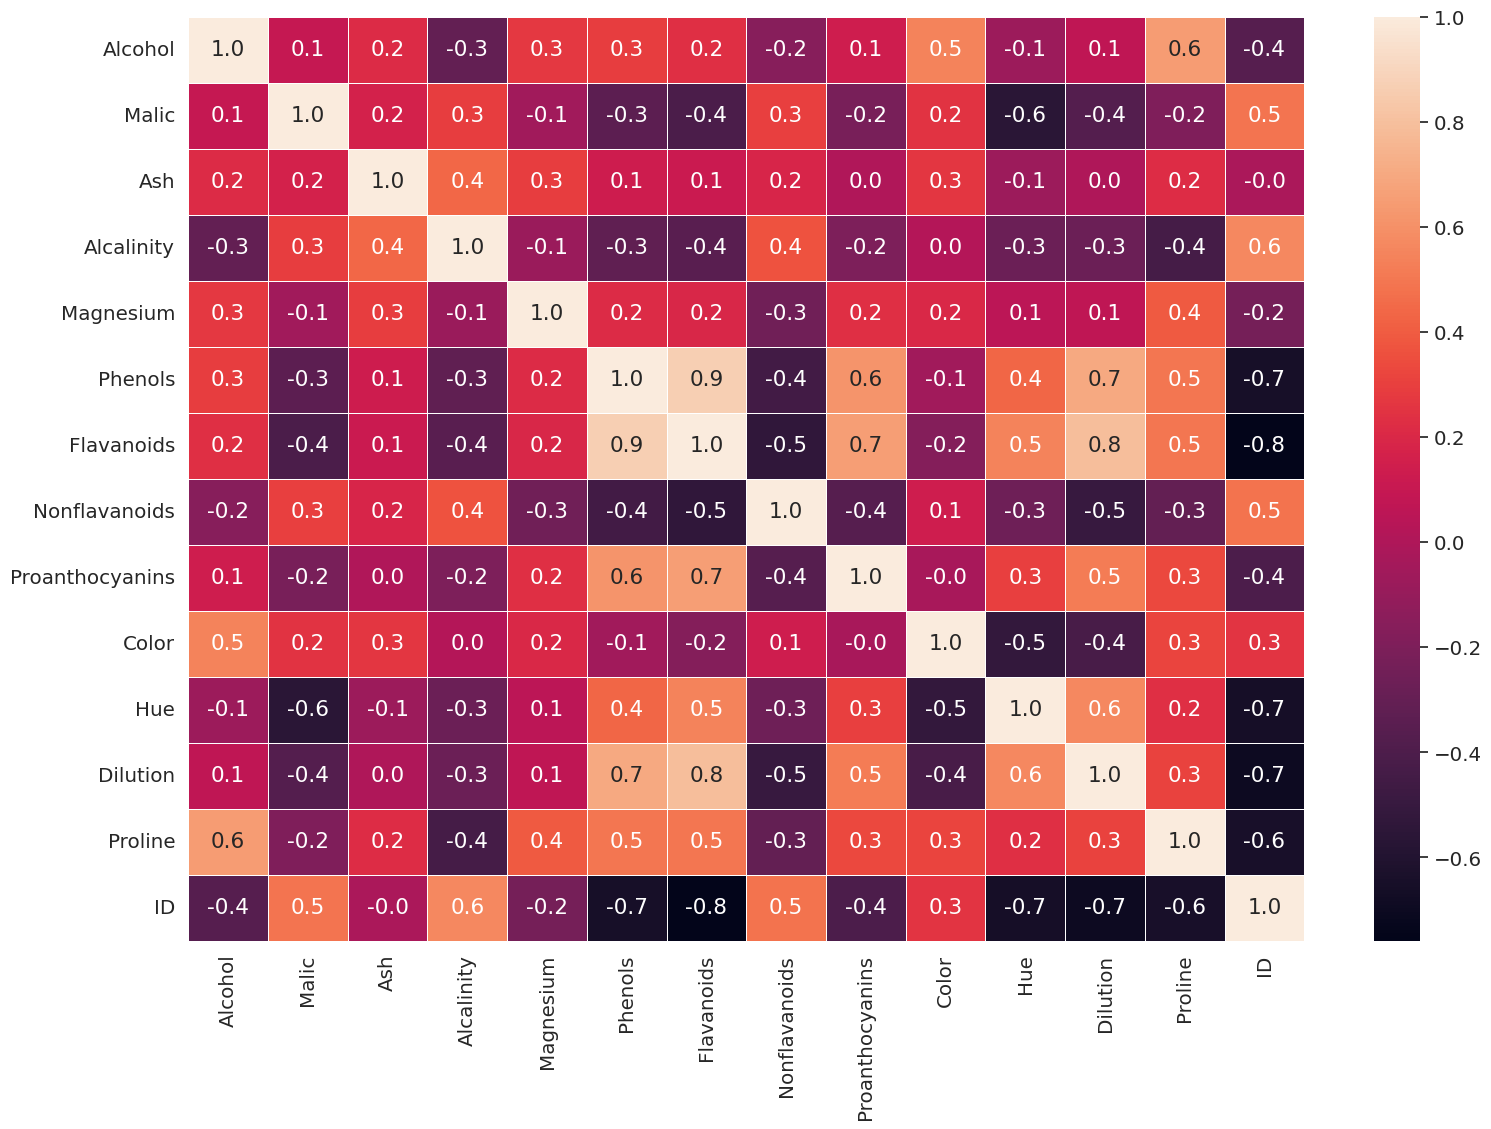

In [ ]:
# correlation coefficient

f, ax = plt.subplots(figsize=(18,12))
sns.heatmap(df.corr(), annot=True, linewidths=0.5,fmt='.1f',ax=ax)
plt.show()

<b>Unique points in this correlation matrix:</b>

+ Phenols is positively correlated with Flavanoids, Dilution and Proanthocyanins
+ Flavanoids is positively correlated with Proanthocyanins and Dilution
+ Dilution is positively correlated with Hue
+ Alcohol is positively correlated with Proline

# Data Preprocessing

### Applying standard scaler on data

In [ ]:
standard_scaler = StandardScaler()
std_df = standard_scaler.fit_transform(df)
std_df.shape

(178, 14)

### Applying minmax scaler on data

In [ ]:
minmax = MinMaxScaler()
minmax_df = minmax.fit_transform(df)
minmax_df.shape

(178, 14)

## 6. PCA<a class="anchor" id="6"></a>
<b>Principal Component Analysis (PCA)</b> was the first dimensionality reduction technique discovered (by Karl Pearson - yes, the guy from Pearson's correlation coefficient) and dates back to as early as <b>1901</b>. It is very popular because it is <b>fast, easy to implement and easy to interpret.

PCA works by finding a low dimensional subspace that <b>maximises the variance</b> of the data in that subspace and performing a <b>linear projection.</b> This basically means the data will be as <b>spread out</b> as possible, without changing the relationship between the data points. This allows us to find patterns or indentify clusters if any exist.

### Principal Component Analysis
Let's discuss PCA! Since this isn't exactly a full machine learning algorithm, but instead an unsupervised learning algorithm.

#### PCA Review

## PCA on standard Scaled

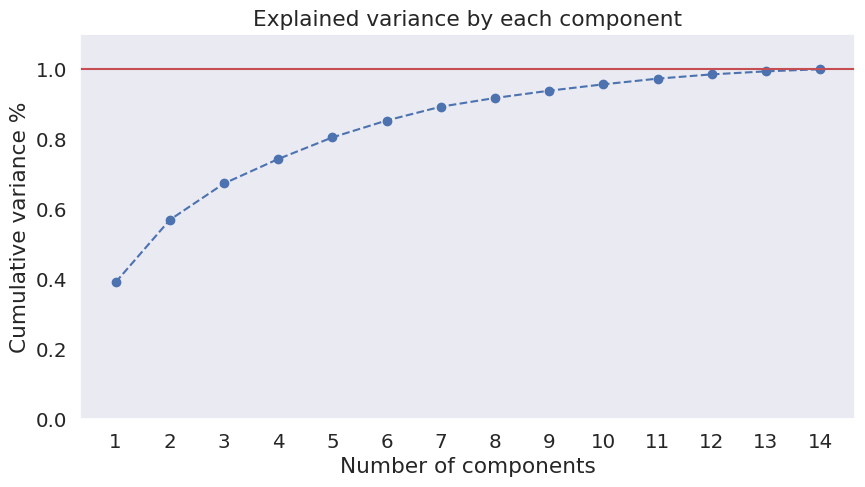

In [ ]:
# PCA
pca_var = PCA()
pca_var.fit(std_df)

# plot
plt.figure(figsize=(10,5))
xi = np.arange(1, 1+std_df.shape[1], step=1)
yi = np.cumsum(pca_var.explained_variance_ratio_)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

# Aesthetics
plt.ylim(0.0, 1.1)
plt.xlabel('Number of components')
plt.xticks(np.arange(1,1+std_df.shape[1], step=1))
plt.ylabel('Cumulative variance %')
plt.title('Explained variance by each component')
plt.axhline(y=1, color='r', linestyle='-')
plt.gca().xaxis.grid(False)

In [ ]:
# The amount of variance that each PCA explains is
var = pca_var.explained_variance_ratio_
var

array([0.39129819, 0.17835849, 0.10392085, 0.06990396, 0.06183992,
       0.04819035, 0.03948381, 0.02490743, 0.02078919, 0.01822808,
       0.01621756, 0.01222483, 0.00864803, 0.0059893 ])

Text(0.5, 1.0, 'Explained variance by each component')

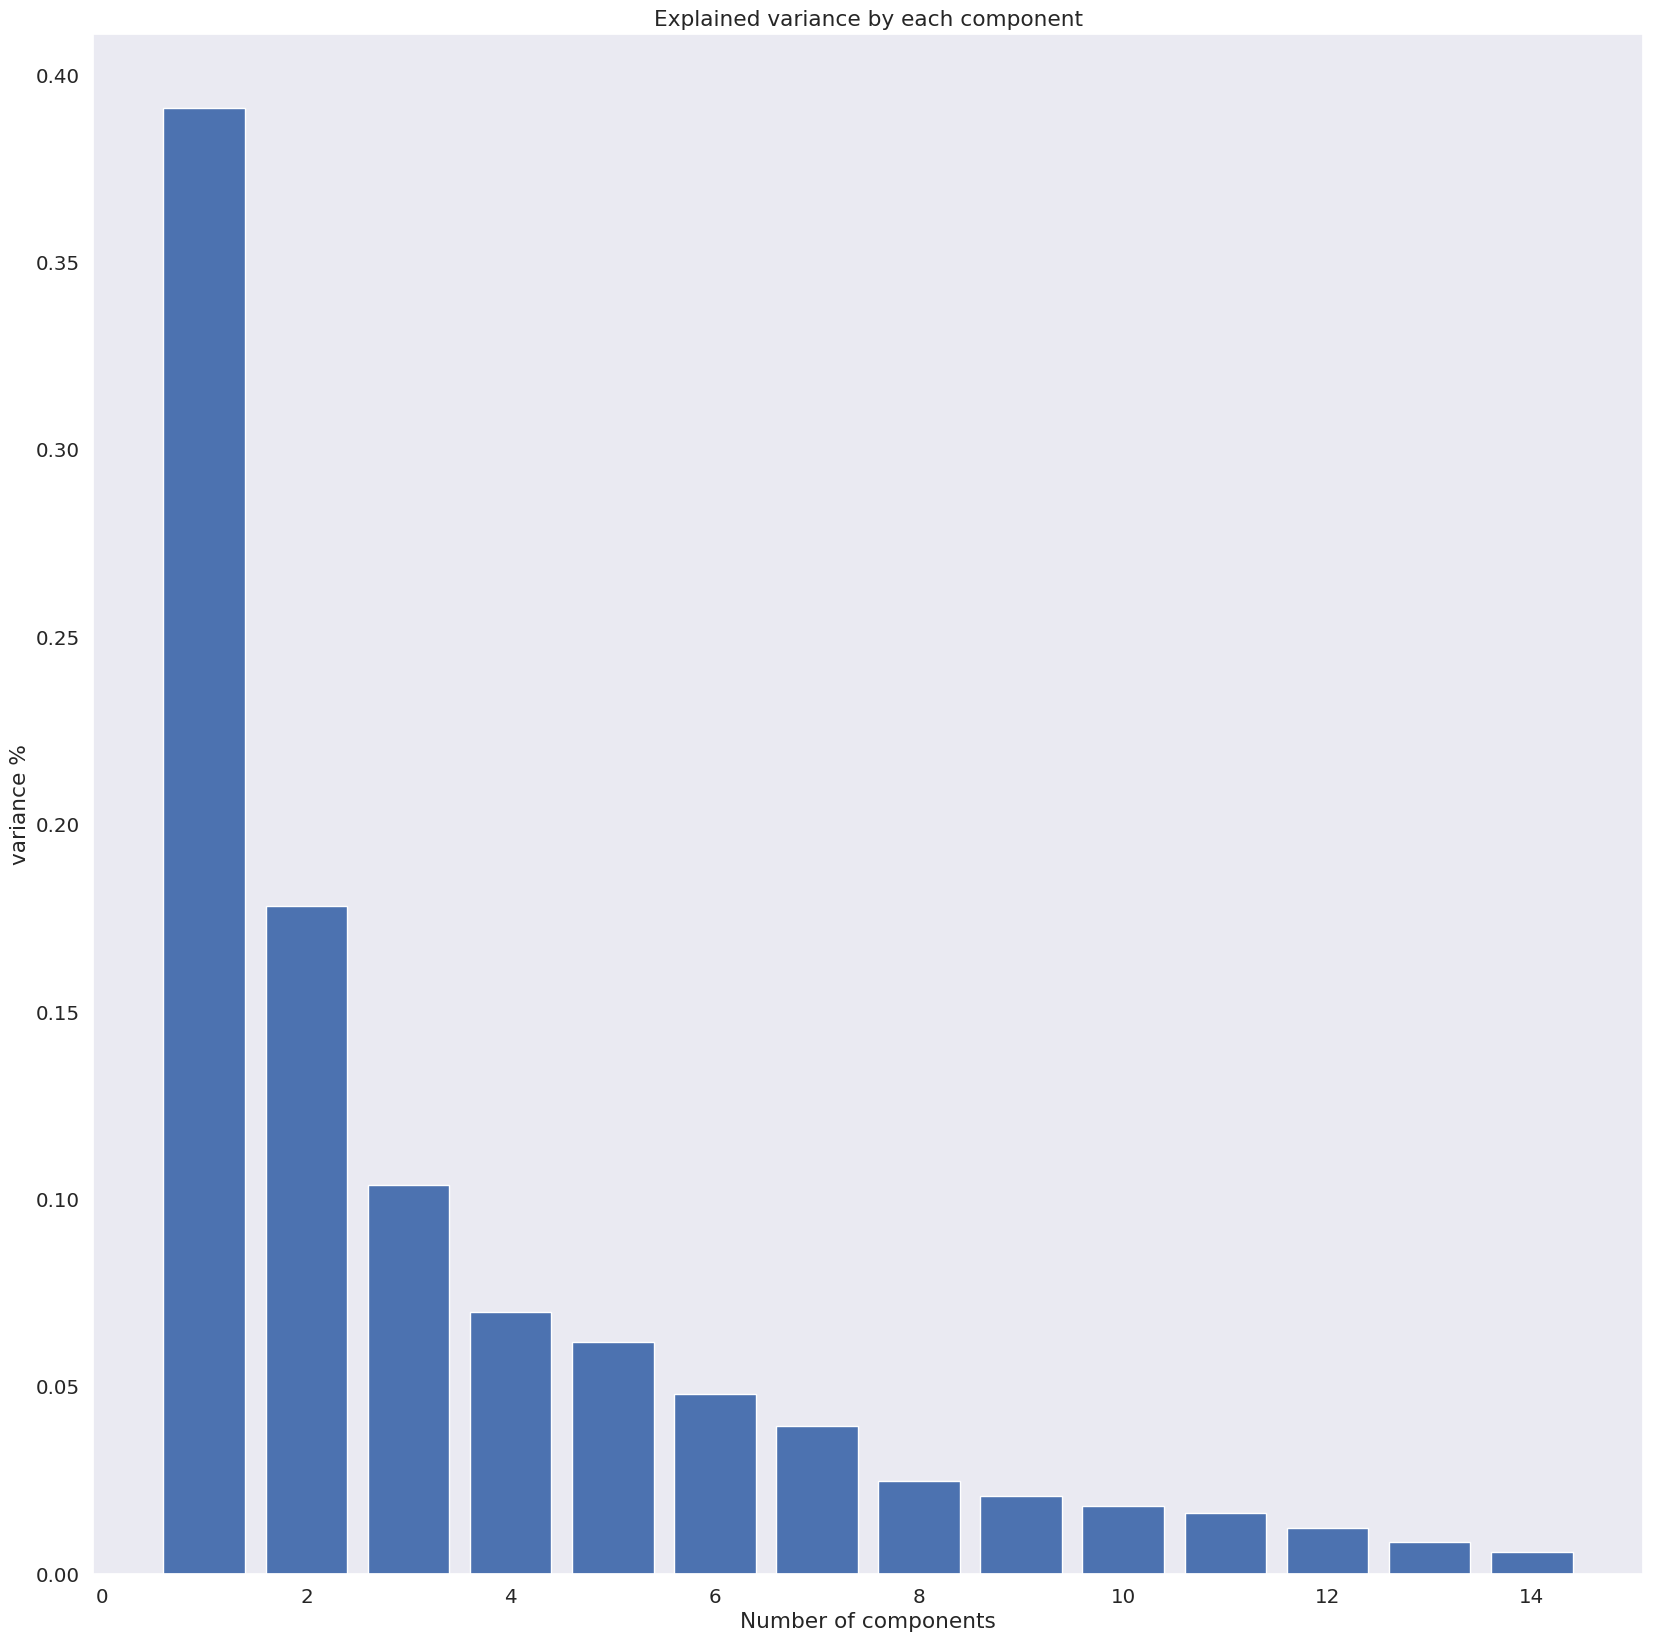

In [ ]:
plt.bar(range(1, len(var)+1), var)
plt.xlabel('Number of components')
plt.ylabel('variance %')
plt.title('Explained variance by each component')

In [ ]:
# Cumulative variance
var1 = np.cumsum(np.round(var, decimals=4)*100)
var1

array([39.13, 56.97, 67.36, 74.35, 80.53, 85.35, 89.3 , 91.79, 93.87,
       95.69, 97.31, 98.53, 99.39, 99.99])

In [ ]:
# PCA
pca = PCA(n_components=3)
pca_std = pca.fit_transform(std_df)

# Convert to dataframe
pca_std_df = pd.DataFrame(data = pca_std, columns=['PC1','PC2','PC3'])

# shape and preview
print(pca_std_df.shape)
pca_std_df.head()

(178, 3)


,PC1,PC2,PC3
0,3.723816,-1.447476,-0.153274
1,2.734987,0.334166,-2.079717
2,2.944840,-1.033583,0.979570
3,4.094144,-2.762344,-0.123541
4,1.550429,-0.867267,1.915570


## PCA plot in 2D

Text(0, 0.5, 'PC2')

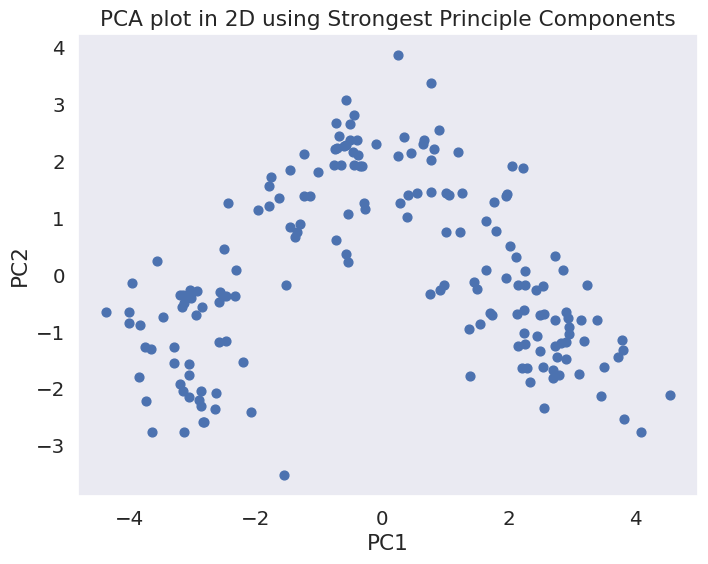

In [ ]:
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(pca_std_df.iloc[:,0], pca_std_df.iloc[:,1], s=40)

# Aesthetics
plt.title('PCA plot in 2D using Strongest Principle Components')
plt.xlabel('PC1')
plt.ylabel('PC2')

# PCA on MinMax scaled dataset

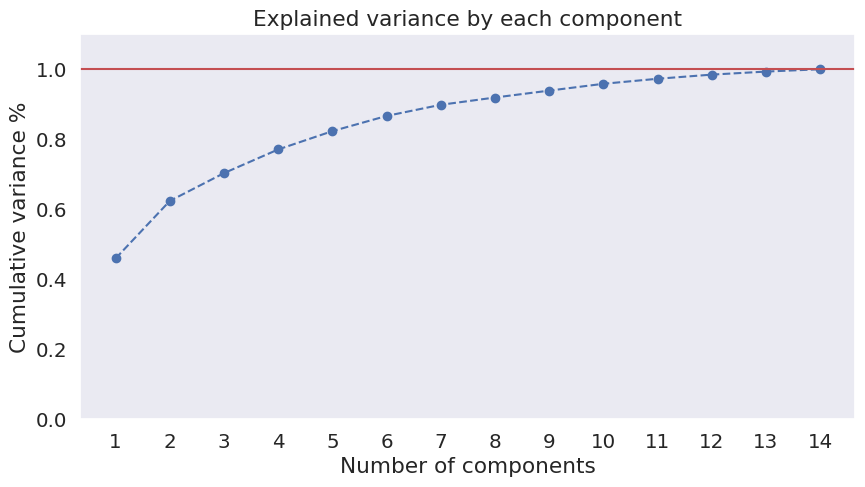

In [ ]:
# PCA MinMaxScaled
pca_var = PCA()
pca_var.fit(minmax_df)

# plot
plt.figure(figsize=(10,5))
xi = np.arange(1, 1+minmax_df.shape[1], step=1)
yi = np.cumsum(pca_var.explained_variance_ratio_)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

# Aesthetics
plt.ylim(0.0, 1.1)
plt.xlabel('Number of components')
plt.xticks(np.arange(1, 1+minmax_df.shape[1], step=1))
plt.ylabel('Cumulative variance %')
plt.title('Explained variance by each component')
plt.axhline(y=1, color='r', linestyle='-')

It is interesting to see that with just 2 components we capture over 50% of the variance. And by moving up to 3 components, we get 2 thirds of the variance.

For this reason, sometimes PCA is used for feature selection. For very big datasets with hundreds of features, it can take a long time to train models with some features not adding much value. A solution is to reduce the number of columns by using principal components from PCA. The number of components is normally chosen by looking at the explained variance graph (e.g. a minimum of 60% might be required).

In [ ]:
# The amount of variance that each PCA explains
var = pca_var.explained_variance_ratio_
var

array([0.459506  , 0.16420046, 0.07951977, 0.06762289, 0.05235124,
       0.04342315, 0.03180871, 0.02082412, 0.01966956, 0.01951889,
       0.01435926, 0.01185743, 0.0086919 , 0.0066466 ])

Text(0.5, 1.0, 'Explained variance by each component')

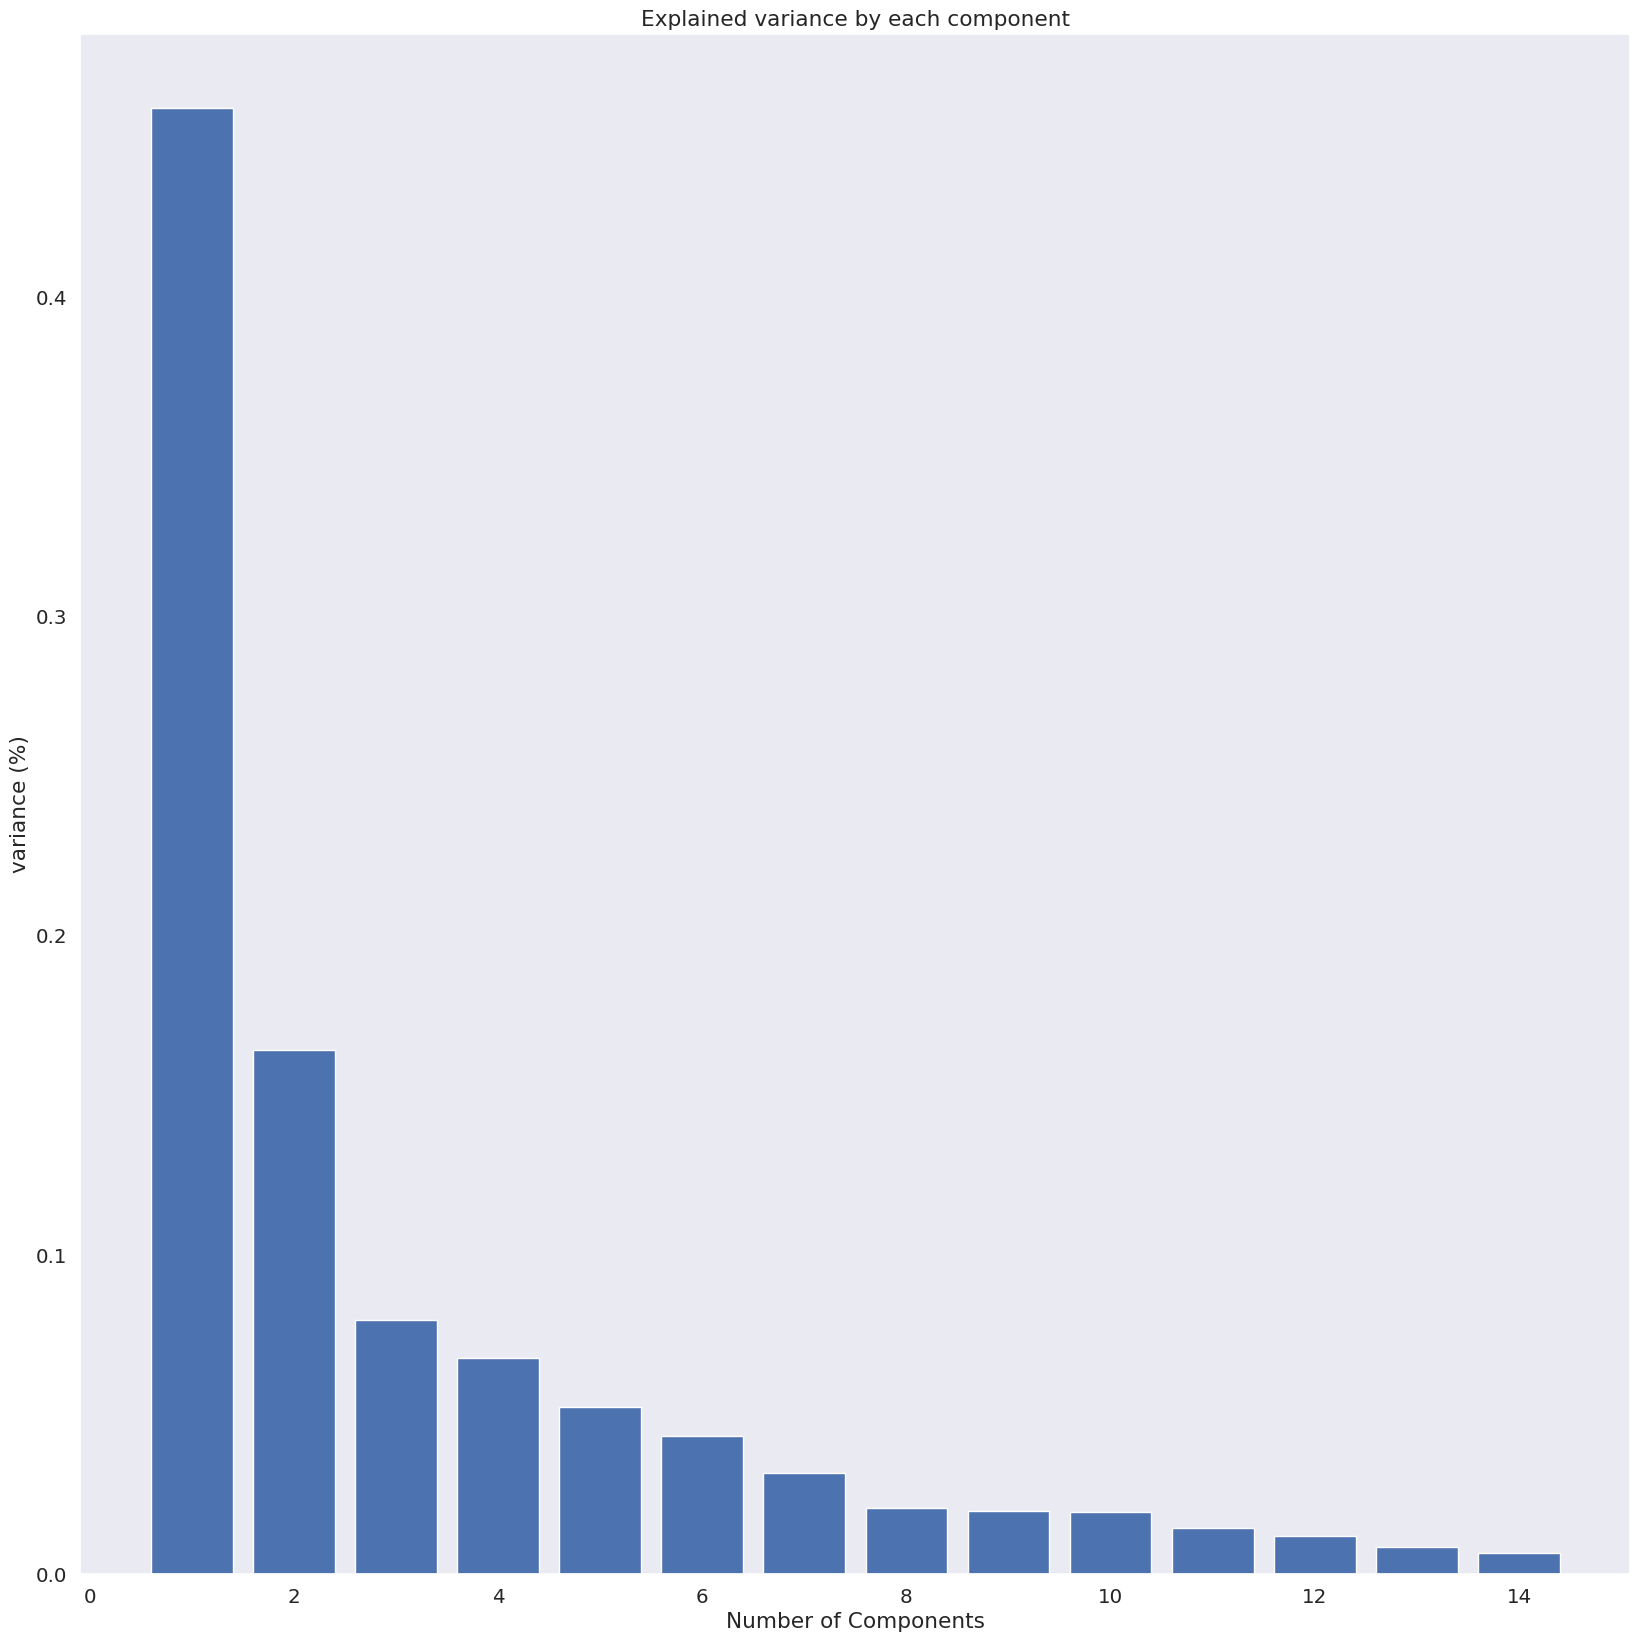

In [ ]:
plt.bar(range(1, len(var)+1),var)
plt.xlabel('Number of Components')
plt.ylabel('variance (%)')
plt.title('Explained variance by each component')

In [ ]:
# Cumulative variance
var1 = np.cumsum(np.round(var, decimals = 4)*100)
var1

array([ 45.95,  62.37,  70.32,  77.08,  82.32,  86.66,  89.84,  91.92,
        93.89,  95.84,  97.28,  98.47,  99.34, 100.  ])

In [ ]:
# PCA
pca = PCA(n_components=3)
pca_minmax = pca.fit_transform(minmax_df)

# Convert to data frame
pca_minmax_df = pd.DataFrame(data = pca_minmax, columns = ['PC1', 'PC2','PC3'])

# Shape and preview
print(pca_minmax_df.shape)
pca_minmax_df.head()

(178, 3)


,PC1,PC2,PC3
0,0.864955,-0.246505,0.012715
1,0.676158,-0.011751,-0.306279
2,0.692172,-0.186686,0.139093
3,0.955057,-0.568299,0.123337
4,0.411640,-0.067685,0.118278


##### The new columns are called Principal Components (PC's) and give the coordinates of the data in the new smaller space

## PCA plot in 2D

Text(0, 0.5, 'PC2')

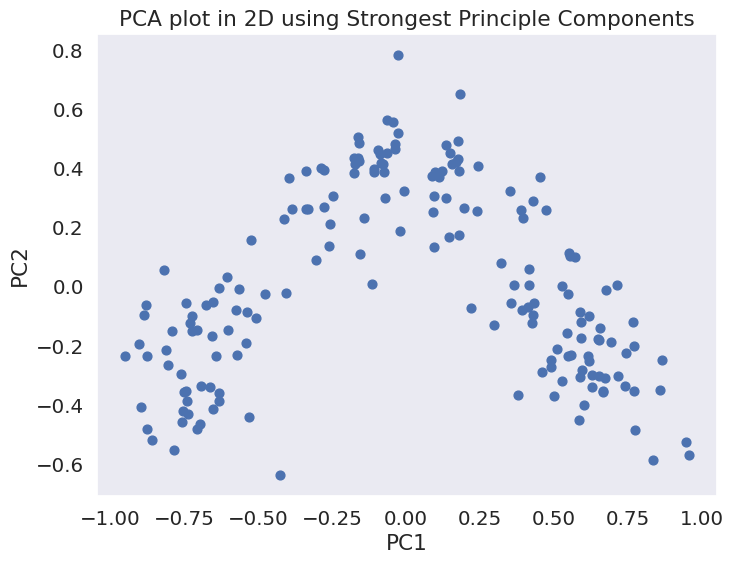

In [ ]:
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], s=40)

# Aesthetics
plt.title('PCA plot in 2D using Strongest Principle Components')
plt.xlabel('PC1')
plt.ylabel('PC2')

<Axes: >

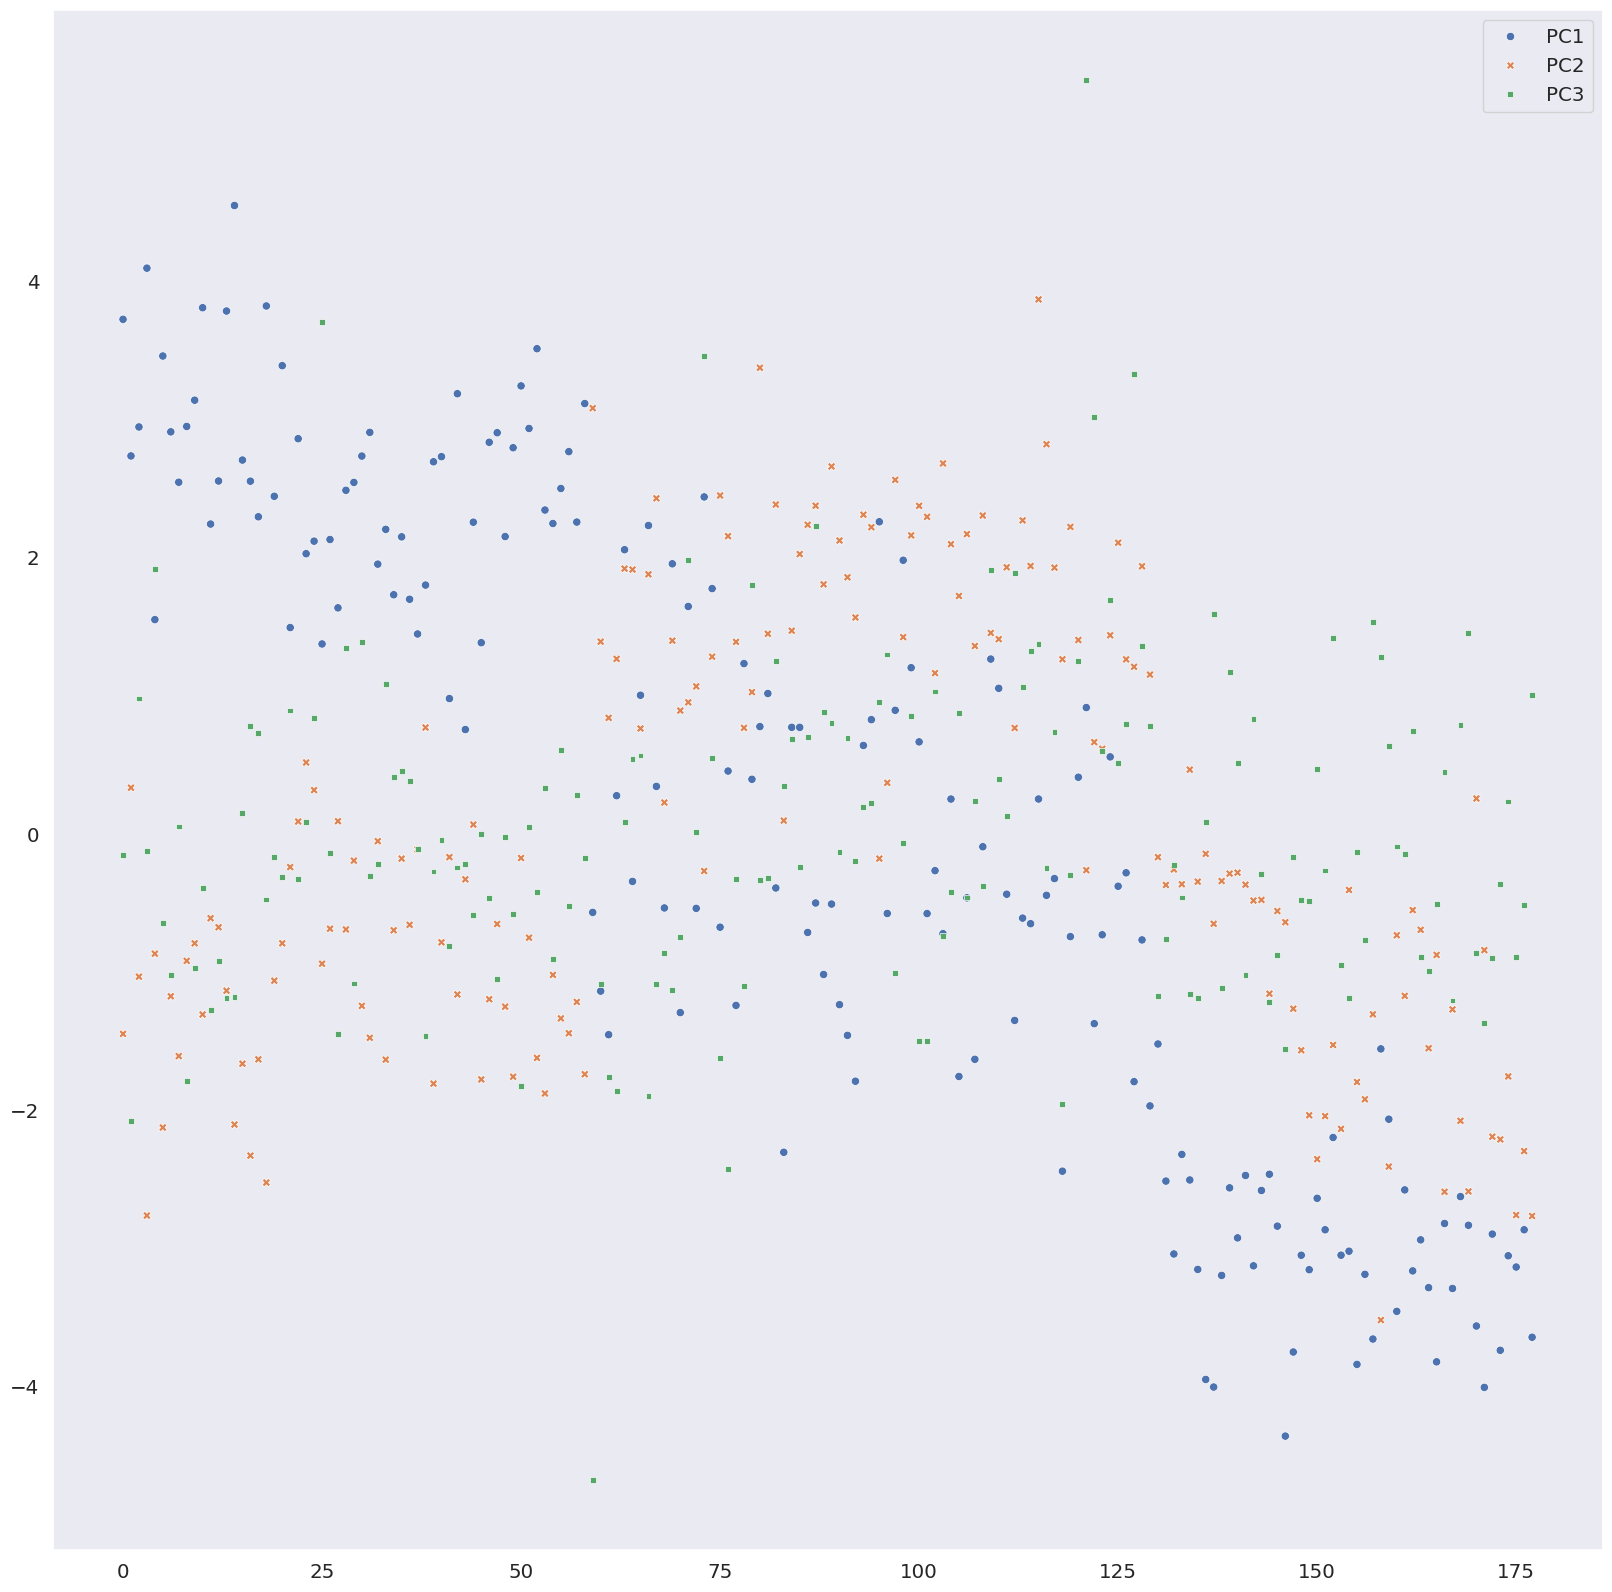

In [ ]:
sns.scatterplot(pca_std_df)

# Clustering Algorithms

# Hierarchical Clustering

In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import normalize

In [ ]:
# Converting data to numpy array
data1 = df.copy()
data1_ary = data1.values

In [ ]:
# Normalizing the numerical data
data_norm = normalize(data1_ary)
data_norm

array([[1.32644666e-02, 1.59397315e-03, 2.26511974e-03, ...,
        3.65402032e-03, 9.92737662e-01, 9.32148040e-04],
       [1.25127780e-02, 1.68732915e-03, 2.02858673e-03, ...,
        3.22298827e-03, 9.95334612e-01, 1.89587545e-03],
       [1.10629783e-02, 1.98393836e-03, 2.24454044e-03, ...,
        2.66486636e-03, 9.96172441e-01, 2.52195555e-03],
       ...,
       [1.53916524e-02, 4.96430086e-03, 2.62133644e-03, ...,
        1.80941807e-03, 9.68502621e-01, 2.04139475e-01],
       [1.51870706e-02, 2.98667523e-03, 2.73298081e-03, ...,
        1.86811347e-03, 9.68651427e-01, 2.04108694e-01],
       [2.37012918e-02, 6.87723258e-03, 4.59600421e-03, ...,
        2.68379808e-03, 9.39329328e-01, 2.98572536e-01]])

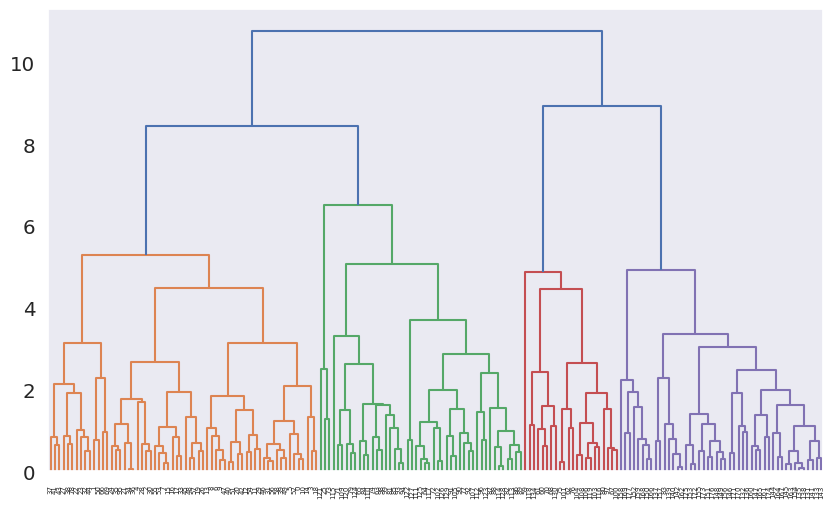

In [ ]:
# Lets create dendogram using normalized data
plt.figure(figsize=(10,6))
dendrogram = sch.dendrogram(sch.linkage(pca_std_df, 'complete'))

In [ ]:
# create clusters (y)
hclusters = AgglomerativeClustering(n_clusters = 3, affinity='euclidean', linkage = 'ward')
hclusters

AgglomerativeClustering(affinity='euclidean', n_clusters=3)

In [ ]:
y = pd.DataFrame(hclusters.fit_predict(pca_std_df), columns=['clusterid'])
y['clusterid'].value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


0    81
2    50
1    47
Name: clusterid, dtype: int64

In [ ]:
# Adding clusters to dataset
data3 = df.copy()
data3['clusterid'] = hclusters.labels_
data3

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ID,clusterid
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,3,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,4,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,174,1
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,175,1
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,176,1
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,177,1


# KMeans Clustering

In [ ]:
# As we already have normalized data
# Use Elbow Graph to find optimum number of  clusters (K value) from K values range
# The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion WCSS
# random state can be anything from 0 to 42, but the same number to be used everytime,so that the results

In [ ]:
# Within cluster sum of squares criterion
wcss = []
for i in range(1,6):
  kmeans = KMeans(n_clusters=i, random_state=2)
  kmeans.fit(pca_std_df)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

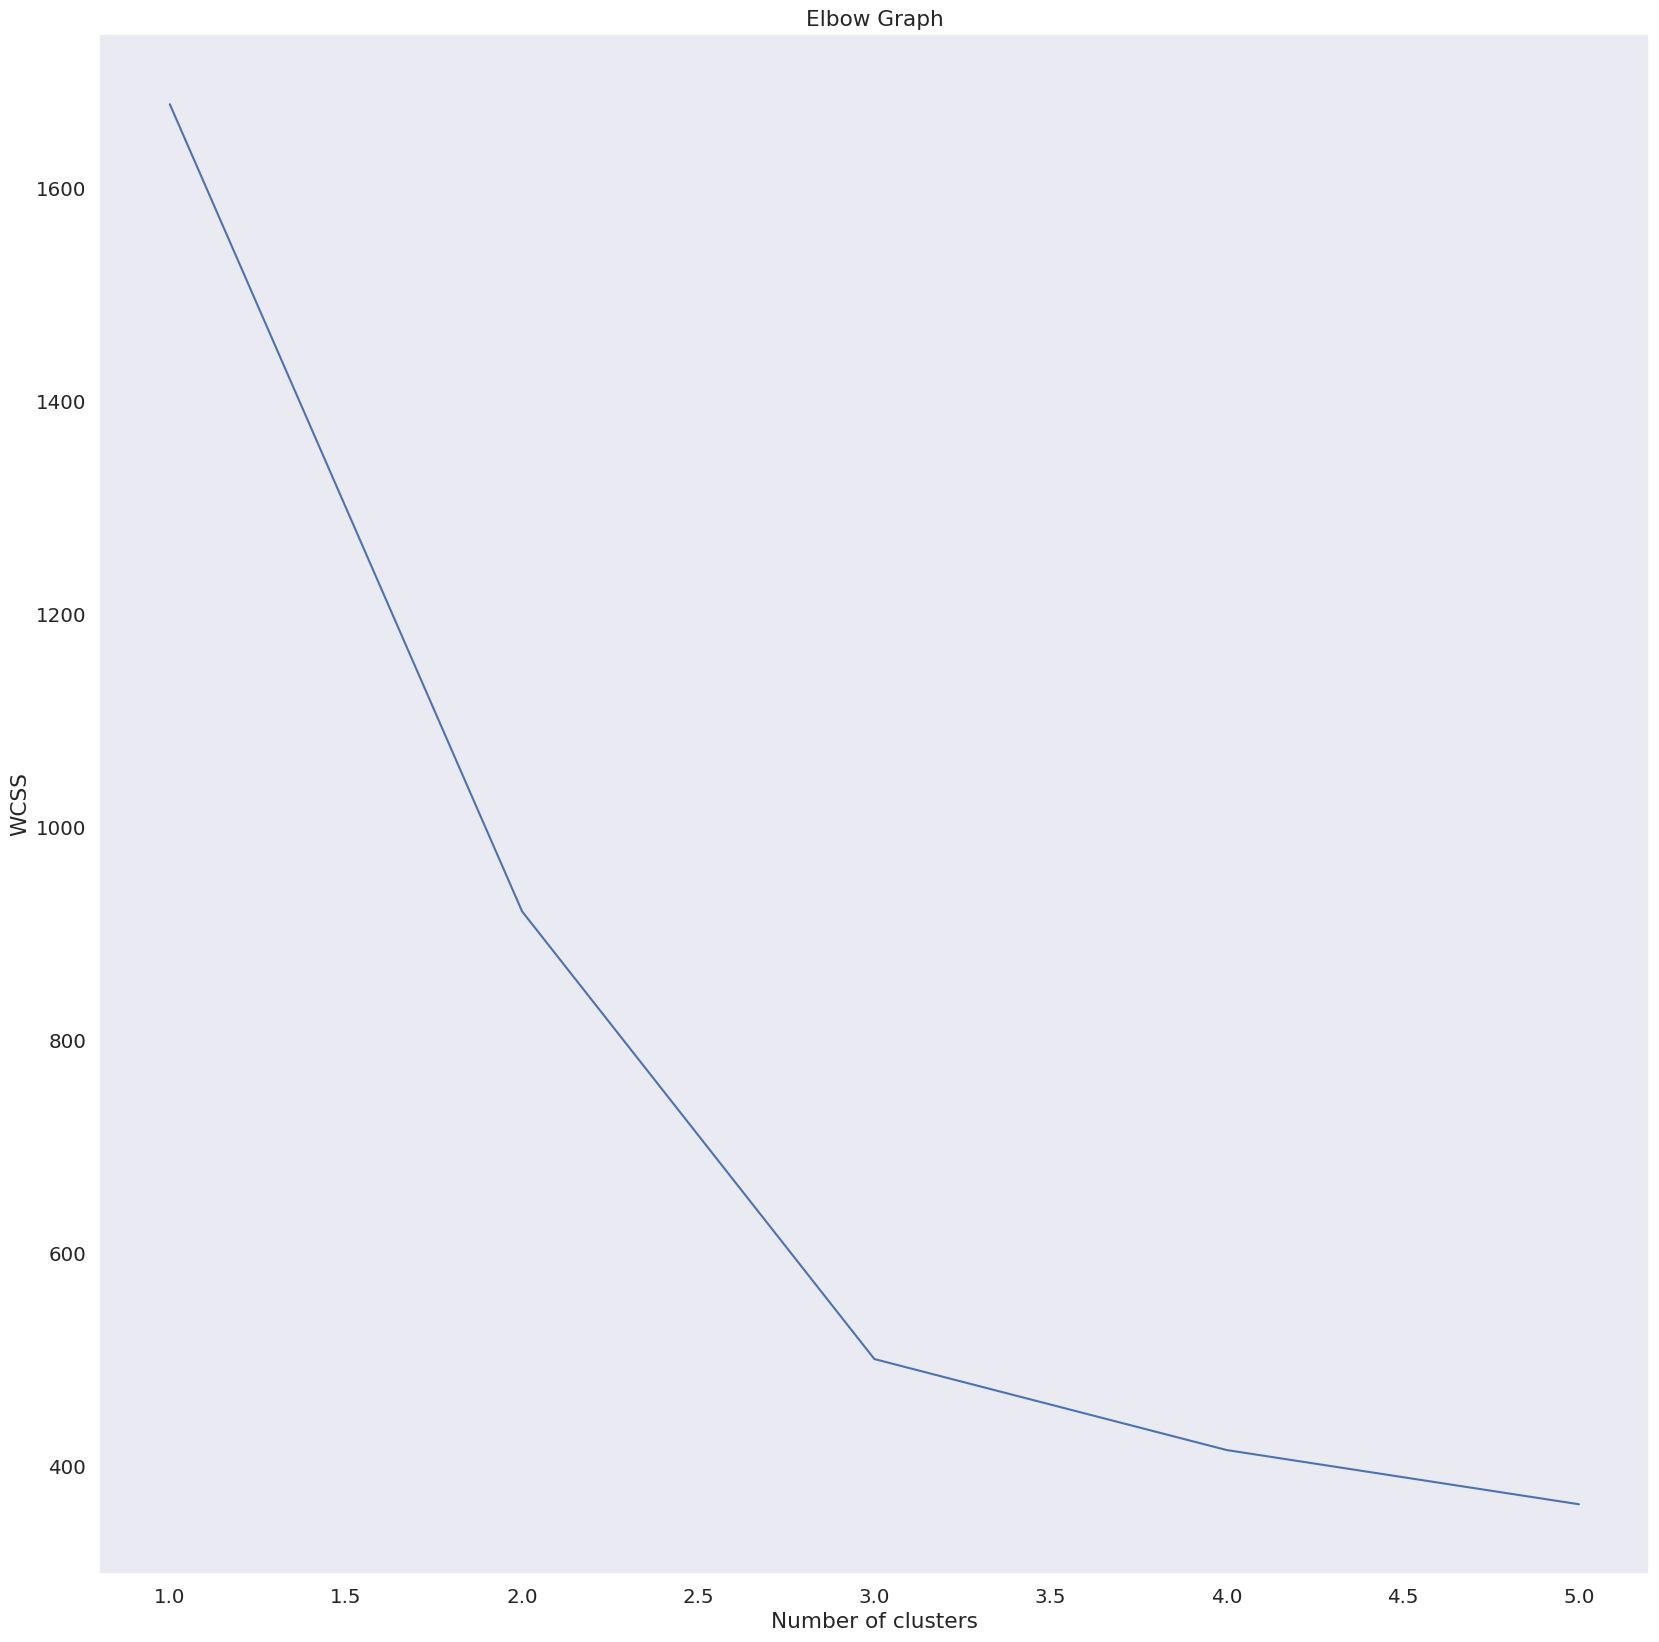

In [ ]:
# Plot k values range vs wcss to get elbow graph for choosing K value
plt.plot(range(1,6), wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# We can see K=3 is most likely suitable value

# Cluster algorithm using k=3
kcluster = KMeans(3, random_state=30).fit(pca_std_df)
kcluster

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=30)

In [ ]:
kcluster.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [ ]:
# Assign clusters to dataset
data4 = df.copy()
data4['kclusterid'] = kcluster.labels_
data4

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ID,kclusterid
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,3,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,4,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,174,1
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,175,1
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,176,1
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,177,1
